#一、数据收集#

#1.WeRateDogs 的推特档案，作为“资料来源：手头文件集#

#2.收集推特图像的预测数据#

In [200]:
import pandas as pd
pd.set_option('max_colwidth',200)
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import os

In [201]:
Download_addres = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'

In [202]:
f = requests.get(Download_addres)

In [203]:
with open("image_predictions.tsv","wb") as code:
     code.write(f.content)

#3.每条推特的额外附加数据，由于无法登陆推特所以直接下载udacity提供的数据，作为“资料来源：手头文件集#

#二、 评估数据#

#1.目测评估#

In [204]:
import pandas as pd
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [205]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

#tweet_id：推特 ID
#in_reply_to_status_id：回复用户ID
#in_reply_to_user_id：被回复推文原始用户ID
#timestamp：发文时间
#source：消息来源
#text：推文内容
#retweeted_status_id：转发ID
#retweeted_status_user_id：转发用户ID
#retweeted_status_timestamp：转发时间
#expanded_urls：推文链接
#rating_numerator：评分分子
#rating_denominator：评分分母
#name：宠物名
#doggo：狗狗是否为大狗
#floofer：狗狗是否是毛好看的狗狗
#pupper：狗狗是否是小狗
#puppo：狗狗是否是青春期的狗狗

In [206]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#1.存在部分转发的推文#
#2.expanded_urls存在缺失值#
#3.tweet_id数据类型错误，将整数类型改为字符串#
#4.in_reply_to_status_id和in_reply_to_user_id缺失项较多，需要删除#
#5.rating_numerator 列应该是 float 类型
#6.对于时间戳 timestamp 而言，数据应该是 datetime 类型；

In [207]:
twitter_archive_enhanced.rating_denominator.value_counts().head()

10    2333
11       3
50       3
80       2
20       2
Name: rating_denominator, dtype: int64

#7.评分的分母不统一，有些过大#

In [208]:
twitter_archive_enhanced['name'].sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

#8.name 中存在一些提取错误的名字，比如 a, an, the 等

In [209]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#tweet_id：推特 ID
#jpg_url：预测的图像资源链接
#img_num：最可信的预测结果对应的图像编号
#p1：算法对推特中图片的一号预测
#p1_conf：算法的一号预测的可信度
#p1_dog：一号预测该图片是否属于“狗”
#p2：算法对推特中图片的二号预测
#p2_conf：算法的二号预测的可信度
#p2_dog：二号预测该图片是否属于“狗”
#p3：算法对推特中图片的三号预测
#p3_conf：算法的三号预测的可信度
#p3_dog：三号预测该图片是否属于“狗”

In [210]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [211]:
import json
tweet_list=[]
with open('tweet_json.txt',) as f:
    for line in f:
        json_dict= json.loads(line)
        to_append= {
            'tweet_id':json_dict['id_str'],
            'retweet_count':json_dict['retweet_count'],
            'favorite_count':json_dict['favorite_count']
        }
        tweet_list.append(to_append)
df_json=pd.DataFrame(tweet_list, columns=['tweet_id','retweet_count','favorite_count'])

In [212]:
tweet = pd.DataFrame(tweet_list, columns = ['tweet_id','retweet_count','favorite_count'])

In [213]:
tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


#tweet_id:推特Id#
#retweet_count:转发数#
#favoite_count:点赞数#

#1.存在部分转发的推文#
#2.expanded_urls存在缺失值#
#3.tweet_id数据类型错误，将整数类型改为字符串#
#4.in_reply_to_status_id和in_reply_to_user_id缺失项较多，需要删除#
#5.rating_numerator 列应该是 float 类型
#6.对于时间戳 timestamp 而言，数据应该是 datetime 类型；
#7.评分的分母不统一，有些过大#
#8.name 中存在一些提取错误的名字，比如 a, an, the 等

#整洁度#

#（1）根据 tidy data 的第一条原则，变量按列来组织（即：一个变量一列），doggo, floofer, pupper, puppo 这四列应该合并为一列
#（2）三个数据集都是以 tweet_id 为观察单位，所以合并为一个单独的表格

#三、 清洗数据#

In [214]:
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_clean = tweet.copy()

#质量问题的解决#

#1.存在部分转发的推文,text中包含“RE @”的推文删除#

In [215]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.find('RT @') == -1]
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#2.drop掉 expanded_urls#

In [216]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['expanded_urls'],axis=1)
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(9)
memory usage: 288.9+ KB


#3.tweet_id数据类型错误，将整数类型改为字符串#

In [217]:
twitter_archive_enhanced_clean['tweet_id']=twitter_archive_enhanced_clean['tweet_id'].astype('str')

In [218]:
image_predictions_clean['tweet_id']=image_predictions_clean['tweet_id'].astype('str')

#4.in_reply_to_status_id和in_reply_to_user_id缺失项较多，需要删除#

In [219]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

#5.rating_numerator 列应该是 float 类型

In [220]:
twitter_archive_enhanced_clean['rating_numerator']=twitter_archive_enhanced_clean['rating_numerator'].astype('float')

#6.对于时间戳 timestamp 而言，数据应该是 datetime 类型；

In [221]:
twitter_archive_enhanced.timestamp = pd.to_datetime(twitter_archive_enhanced.timestamp.str.split('+',expand=True)[0])
twitter_archive_enhanced.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

#7.评分的分母不统一，有些过大。但是过大的分母，并不一定的错误的，分母不等于 10 的 text 原文中有一些没有被约分的分数，比如说 99/90，其实是指 9 只 11/10 的狗狗评分，这样的评分可以通过将分子除以分母获得一个 rating 列来解决#

In [222]:
twitter_archive_enhanced_clean['new_rating_numerator'] = twitter_archive_enhanced_clean.text.str.extract('((?:\d+\.)?\d+)/\d+',expand=True)

In [223]:
twitter_archive_enhanced_clean['new_rating_denominator'] = twitter_archive_enhanced_clean.text.str.extract('\d+/(\d+)',expand=True)

In [224]:
twitter_archive_enhanced_clean.new_rating_numerator = twitter_archive_enhanced_clean.new_rating_numerator.astype(float)

In [225]:
twitter_archive_enhanced_clean.new_rating_denominator = twitter_archive_enhanced_clean.new_rating_denominator.astype(float)

In [226]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.new_rating_denominator != 10]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_rating_numerator,new_rating_denominator
313,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,960.0,0,None,None,None,None,None,960.0,0.0
342,832088576586297345,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,11.0,15,None,None,None,None,None,11.0,15.0
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,84.0,70,None,None,None,None,None,84.0,70.0
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,24.0,7,Sam,None,None,None,None,24.0,7.0
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,165.0,150,None,None,None,None,None,165.0,150.0
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,9.0,11,None,None,None,None,None,9.0,11.0
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,204.0,170,this,None,None,None,None,204.0,170.0
1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,4.0,20,None,None,None,None,None,4.0,20.0
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,50.0,50,Bluebert,None,None,None,None,50.0,50.0
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,99.0,90,None,None,None,None,None,99.0,90.0


In [227]:
twitter_archive_enhanced_clean['rating_score'] = twitter_archive_enhanced_clean.rating_numerator/twitter_archive_enhanced_clean.rating_denominator

In [228]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_rating_numerator,new_rating_denominator,rating_score
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,13.0,10,Phineas,None,None,None,None,13.0,10.0,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,13.0,10,Tilly,None,None,None,None,13.0,10.0,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,12.0,10,Archie,None,None,None,None,12.0,10.0,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,13.0,10,Darla,None,None,None,None,13.0,10.0,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,12.0,10,Franklin,None,None,None,None,12.0,10.0,1.2


24/7 指的是7天 24 小时，并不是一个评分，这条推文中也没有具体的评分， drop 掉；

In [229]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop([516])

#8.name 中存在一些提取错误的名字，比如 a, an, the 等

In [230]:

twitter_archive_enhanced['name'].sort_values()
replace=['a','the','an','None',' ']
for name in replace:
    twitter_archive_enhanced_clean['name'] = twitter_archive_enhanced_clean['name'].replace(name,np.nan)
    twitter_archive_enhanced_clean['name'].value_counts()

#整洁度问题的解决#

#（1）根据 tidy data 的第一条原则，变量按列来组织（即：一个变量一列），doggo, floofer, pupper, puppo 这四列应该合并为一列

In [231]:
twitter_archive_enhanced_clean ['stage'] = twitter_archive_enhanced_clean.text.str.lower().str.findall('(doggo|floofer|pupper|puppo)')
twitter_archive_enhanced_clean ['stage'] = twitter_archive_enhanced_clean.stage.str.join(',')
twitter_archive_enhanced_clean .drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#（2）三个数据集都是以 tweet_id 为观察单位，所以合并为一个单独的表格

In [232]:
df = twitter_archive_enhanced_clean.merge(tweet_clean,how='left').merge(image_predictions_clean,how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 27 columns):
tweet_id                      1993 non-null object
timestamp                     1993 non-null object
source                        1993 non-null object
text                          1993 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              1993 non-null float64
rating_denominator            1993 non-null int64
name                          1379 non-null object
new_rating_numerator          1993 non-null float64
new_rating_denominator        1993 non-null float64
rating_score                  1993 non-null float64
stage                         1993 non-null object
retweet_count                 1993 non-null int64
favorite_count                1993 non-null int64
jpg_url                       1993 non-null object
img_num                       19

In [233]:
df.to_csv('df.csv', index=False)

#数据分析#

In [234]:
df = pd.read_csv('df.csv')

#1.最受欢迎的种类#

In [235]:
#提取狗的种类
variety = []
for index in df.index:
    if df.loc[index]['p1_dog'] == True:
        variety.append(df.loc[index]['p1'])
variety = pd.Series(variety)
variety_top5 = variety.value_counts()[:5]
variety_top5

golden_retriever      138
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
dtype: int64

Text(0.5, 1.0, 'top5 popular dogs')

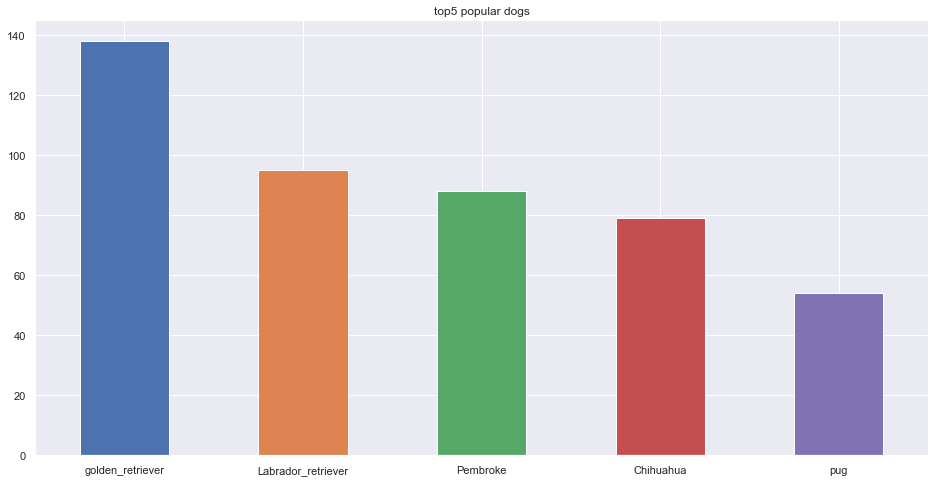

In [236]:
variety_top5.plot(kind = 'bar',figsize=(16,8),rot=0,)
plt.title('top5 popular dogs')

上传图片的用户中，排名前五位分别是金毛犬、拉布拉多犬、柯基犬、吉娃娃、巴哥犬。其中，金毛犬是最受欢迎的狗狗，其次是受欢迎程度旗鼓。相当的拉布拉多犬、柯基犬、吉娃娃

#2.最受欢迎的名字#

In [237]:
!pip install  wordcloud

In [238]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from os import path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [239]:
pet_name=df.name.dropna()
pet_name.sort_values()
pet_name.value_counts()

Charlie     11
Lucy        10
Cooper      10
Oliver      10
Tucker       9
Penny        9
Sadie        8
Winston      8
Daisy        7
Toby         7
Lola         7
Bo           6
Stanley      6
Koda         6
Jax          6
Bella        6
Milo         5
Louis        5
Dave         5
Bailey       5
Leo          5
Rusty        5
Scout        5
Oscar        5
Chester      5
Buddy        5
Finn         4
Cassie       4
very         4
Bentley      4
            ..
Angel        1
Ito          1
Mairi        1
Jersey       1
Gustaf       1
Saydee       1
Farfle       1
Rontu        1
Bungalo      1
Aubie        1
Harrison     1
Jiminus      1
Flash        1
Jockson      1
Berkeley     1
Timison      1
Crimson      1
Grizzie      1
Halo         1
Adele        1
Lacy         1
Tuck         1
Jimbo        1
Theo         1
Caryl        1
Diogi        1
Maddie       1
Sundance     1
Horace       1
Zoe          1
Name: name, Length: 932, dtype: int64

Text(0.5, 1.0, 'top5 popular name')

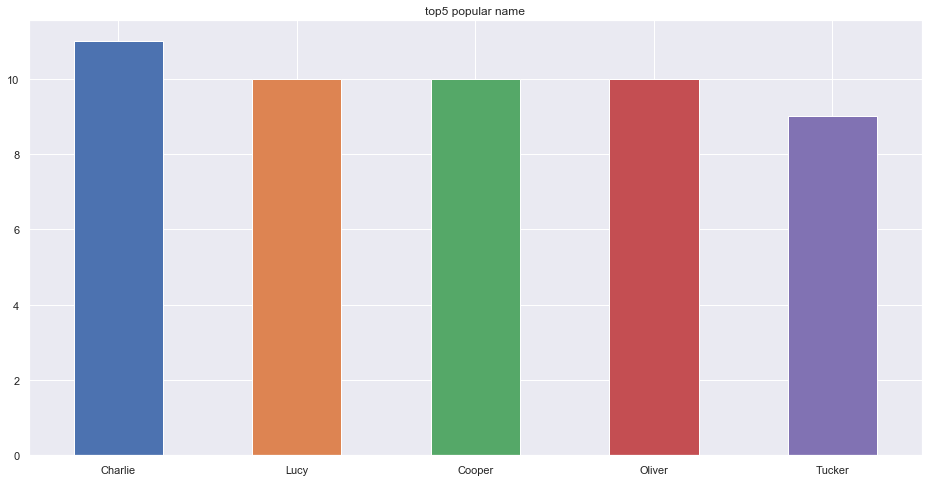

In [240]:
pet_name_top5 = pet_name.value_counts()[:5]
pet_name_top5.plot(kind = 'bar',figsize=(16,8),rot=0,)
plt.title('top5 popular name')

由图可知，最受欢迎的狗狗的名字排名前五的是Charlie\Cooper\Oliever\Lucy\Tucker, 其中Charlie是最受欢迎的，紧接着受欢迎程度不相上下的是cooper。

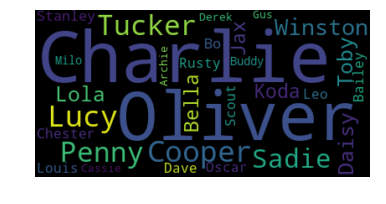

In [241]:
#词云
WordCloud = WordCloud(background_color="black", max_words=30)
WordCloud.generate(' '.join(pet_name))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [242]:
#3.评分是否与点赞有关系#

In [246]:
df.rating_score.value_counts()
df.rating_score.sort_values()

235       0.0
755       0.0
1734      0.1
1899      0.1
1975      0.1
1518      0.1
890       0.2
1947      0.2
1886      0.2
1877      0.2
1963      0.2
1421      0.2
1418      0.2
1722      0.2
1565      0.2
1986      0.2
1486      0.3
1779      0.3
1942      0.3
1166      0.3
1591      0.3
1272      0.3
1583      0.3
1879      0.3
1573      0.3
553       0.3
1843      0.3
1546      0.3
1825      0.3
1105      0.3
        ...  
680       1.4
297       1.4
100       1.4
313       1.4
278       1.4
275       1.4
318       1.4
324       1.4
633       1.4
332       1.4
333       1.4
113       1.4
119       1.4
147       1.4
256       1.4
253       1.4
362       1.4
570       1.4
131       1.4
49        1.4
548       1.4
398       1.4
36        1.4
64        1.4
1279      1.4
1373      2.6
552       2.7
502       7.5
1717     42.0
725     177.6
Name: rating_score, Length: 1993, dtype: float64

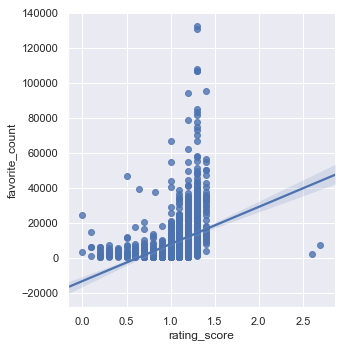

In [249]:
df_relation= df[['rating_score','favorite_count']]
df_relation = df[df['rating_numerator']<40]
import seaborn as sns
sns.set_style("white")
%matplotlib inline
#关系图
sns.set(style="darkgrid")
sns.lmplot(x='rating_score', y='favorite_count',data = df_relation)
plt.show()

由上图可知，点赞数和评分存在相关性关系，并且此关系呈现出正相关的状态，即评分越高点赞数越高。